# BTC : Historical Prices

## Data source loading

In [2]:
import pandas as pd
import numpy as np

# Viz
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Stats
import statsmodels.api as sm
from pylab import rcParams

In [16]:
btc_yahoo = pd.read_csv('/home/giujorge/datalake/lab/Crypto/crypto/data/external/yahoo/daily/usd/BTC-USD.csv', parse_dates=True, index_col=0)

In [5]:
btc_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [6]:
btc_yahoo.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10
2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,3.950807e+10
2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,4.320618e+10
2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,3.747133e+10
2021-09-05,49967.257813,50380.734375,49548.671875,50380.734375,50380.734375,3.086566e+10


In [8]:
btc_yahoo.shape

(2546, 6)

In [10]:
btc_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2546 entries, 2014-09-17 to 2021-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2542 non-null   float64
 1   High       2542 non-null   float64
 2   Low        2542 non-null   float64
 3   Close      2542 non-null   float64
 4   Adj Close  2542 non-null   float64
 5   Volume     2542 non-null   float64
dtypes: float64(6)
memory usage: 139.2 KB


## Descriptive Statistics

In [11]:
abtc_yahoo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03
mean,8769.944647,9019.972647,8500.103779,8788.702374,8788.702374,1.335322e+10
std,12936.817459,13332.388616,12491.242153,12960.807565,12960.807565,1.980157e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,574.081741,578.300003,568.766998,574.159744,574.159744,7.273237e+07
50%,5207.205079,5323.109131,5058.392090,5218.072510,5218.072510,4.337750e+09
75%,9522.637451,9699.815674,9311.406738,9524.767822,9524.767822,2.107336e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


## Visualization

### Plotting Lines

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

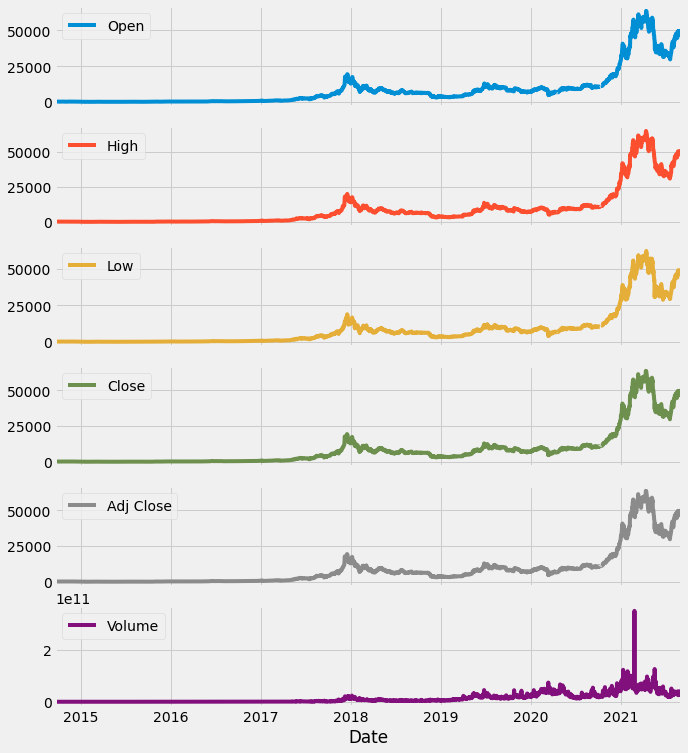

In [17]:
btc_yahoo.plot(subplots=True, figsize=(10,12))

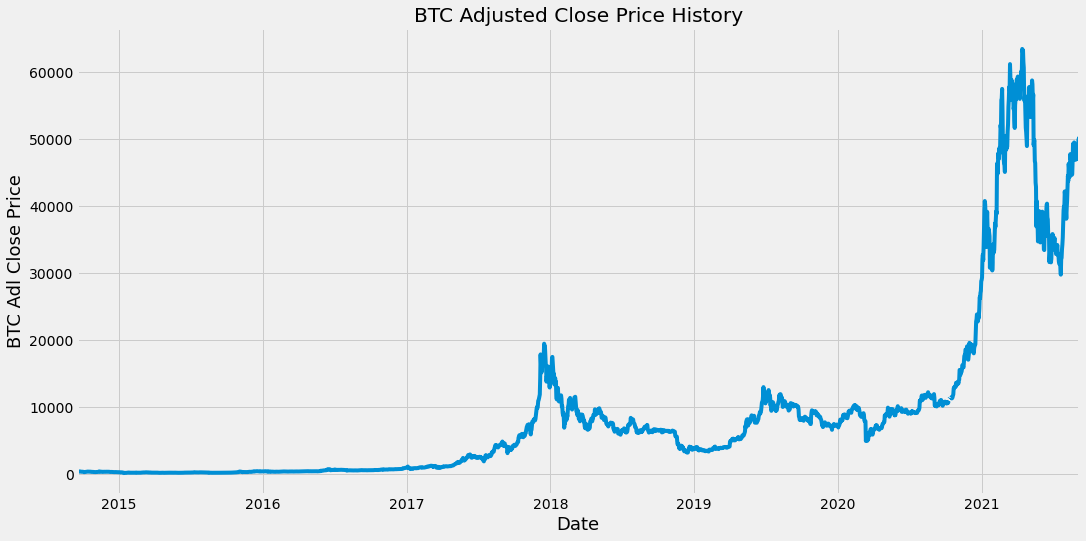

In [22]:
plt.figure(figsize=(16,8))
plt.title('BTC Adjusted Close Price History')
btc_yahoo['Adj Close'].plot()
plt.xlabel('Date',fontsize=18)
plt.ylabel('BTC Adl Close Price',fontsize=18)
plt.show()

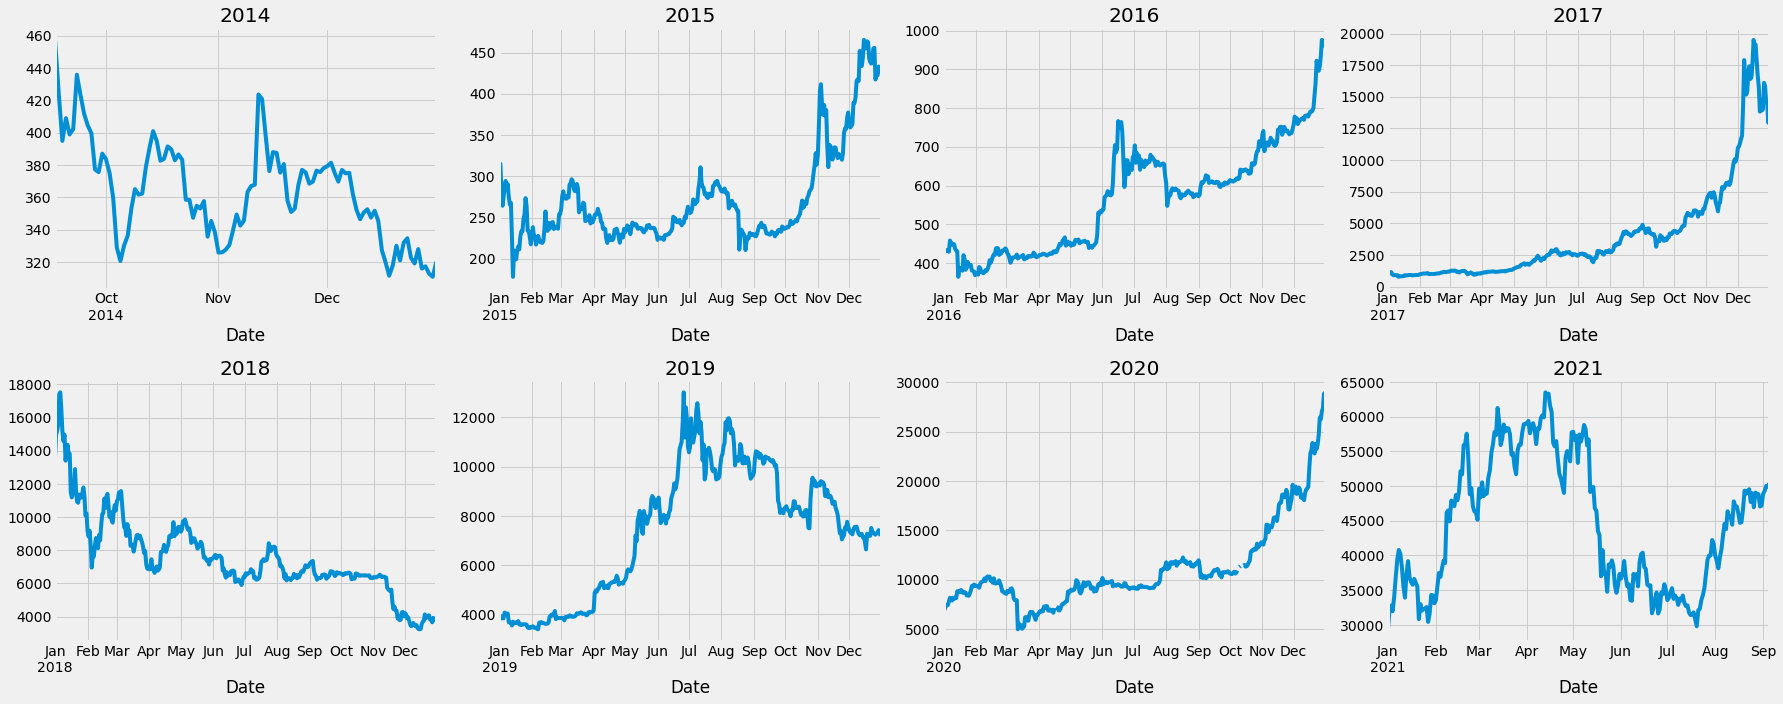

In [93]:
fig = plt.figure(figsize=(25, 10))
for i, j in enumerate(btc_yahoo.index.year.unique(),1):
    ax = fig.add_subplot(2, 4, i)
    plt.subplot(2,4,i).set_title('{}' .format(j))
    
    btc_yahoo.loc[str(j)]['Adj Close'].plot()

plt.tight_layout()

### Histograms

<AxesSubplot:>

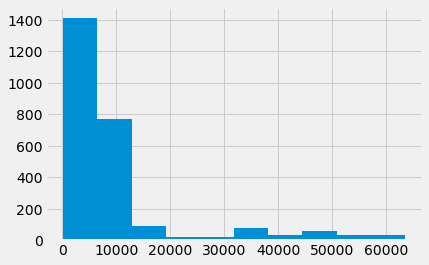

In [58]:
btc_yahoo['Adj Close'].hist()

/tmp/ipykernel_1878/4183391265.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



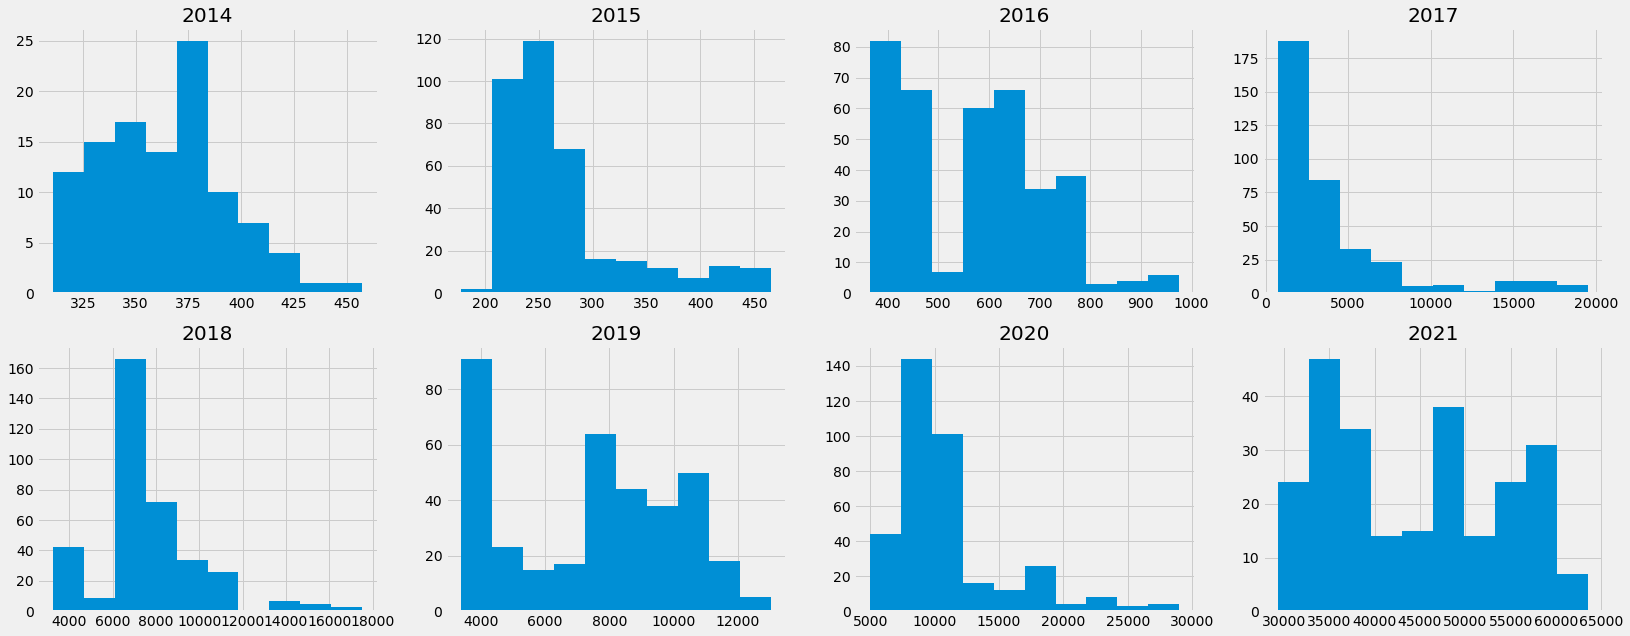

In [57]:
fig = plt.figure(figsize=(25, 10))
for i, j in enumerate(btc_yahoo.index.year.unique(),1):
    ax = fig.add_subplot(2, 4, i)
    btc_yahoo[str(j)]['Adj Close'].hist()
    plt.subplot(2,4,i).set_title('{}' .format(j))
plt.show()

### Density

<AxesSubplot:ylabel='Density'>

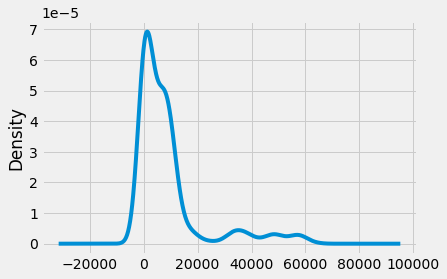

In [36]:
btc_yahoo['Adj Close'].plot(kind= 'kde' )

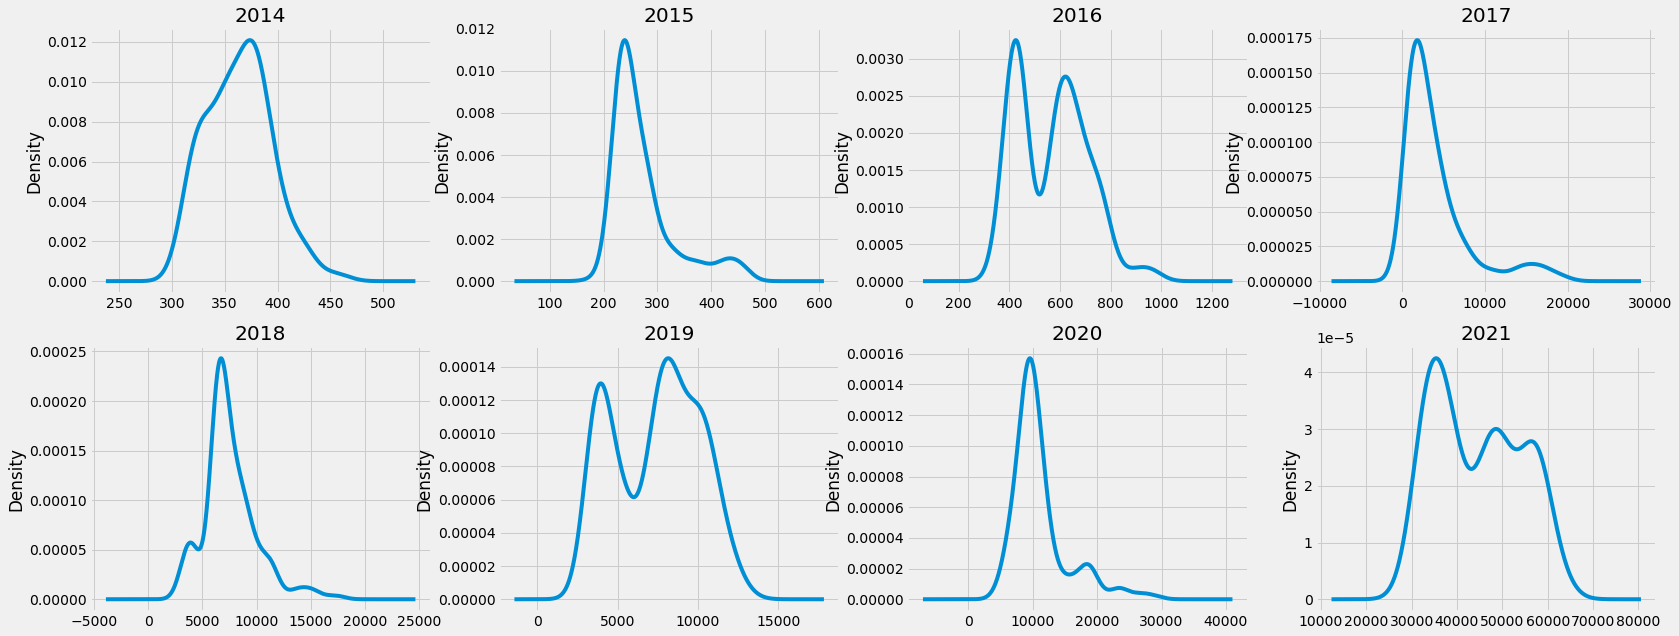

In [66]:
fig = plt.figure(figsize=(25, 10))
for i, j in enumerate(btc_yahoo.index.year.unique(),1):
    ax = fig.add_subplot(2, 4, i)
    plt.subplot(2,4,i).set_title('{}' .format(j))
    
    btc_yahoo.loc[str(j)]['Adj Close'].plot(kind= 'kde' )

plt.show()

### Outliers

In [75]:
btc_yahoo["Adj Close"].groupby(pd.Grouper(freq="Y")).mean()

Date
2014-12-31      363.693085
2015-12-31      272.453381
2016-12-31      568.492407
2017-12-31     4006.033629
2018-12-31     7572.298947
2019-12-31     7395.246282
2020-12-31    11125.798836
2021-12-31    44523.874197
Freq: A-DEC, Name: Adj Close, dtype: float64

<AxesSubplot:>

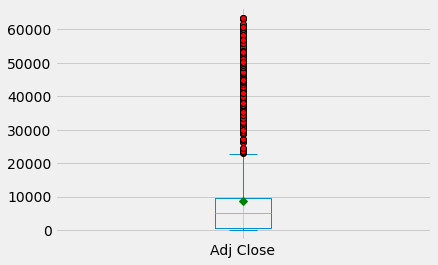

In [91]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
btc_yahoo["Adj Close"].plot(kind='box', flierprops=red_circle, showmeans=True, meanprops=mean_shape)

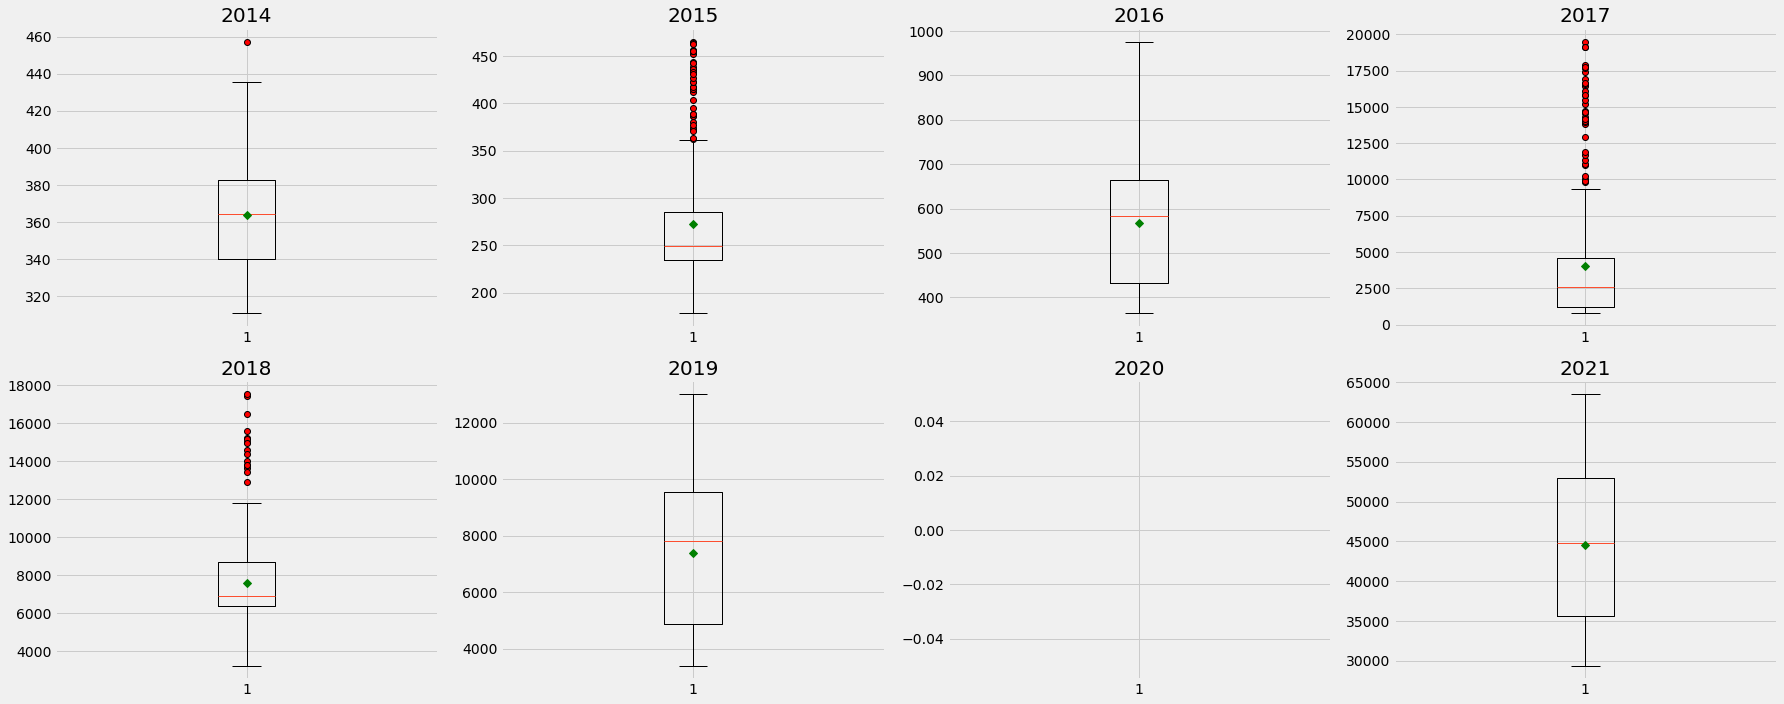

In [112]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig = plt.figure(figsize=(25, 10))
for i, j in enumerate(btc_yahoo.index.year.unique(),1):
    ax = fig.add_subplot(2, 4, i)
    plt.subplot(2,4,i).set_title('{}' .format(j))
    
    ax.boxplot(btc_yahoo[str(j)]["Adj Close"], flierprops=red_circle, showmeans=True, meanprops=mean_shape)

plt.tight_layout()

### OHLC

In [113]:

trace = go.Ohlc(x=btc_yahoo.index,
                open=btc_yahoo.Open,
                high=btc_yahoo.High,
                low=btc_yahoo.Low,
                close=btc_yahoo.Close)
data = [trace]

iplot(data, filename='simple_ohlc')



### Lag Scatter Plots

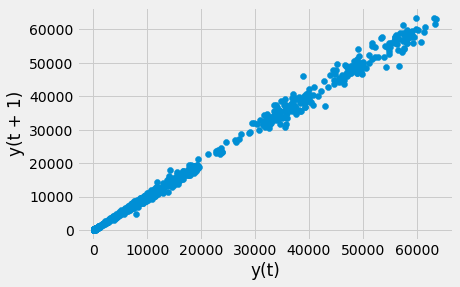

In [201]:
from pandas.plotting import lag_plot
lag_plot(btc_yahoo["Adj Close"])
plt.show()

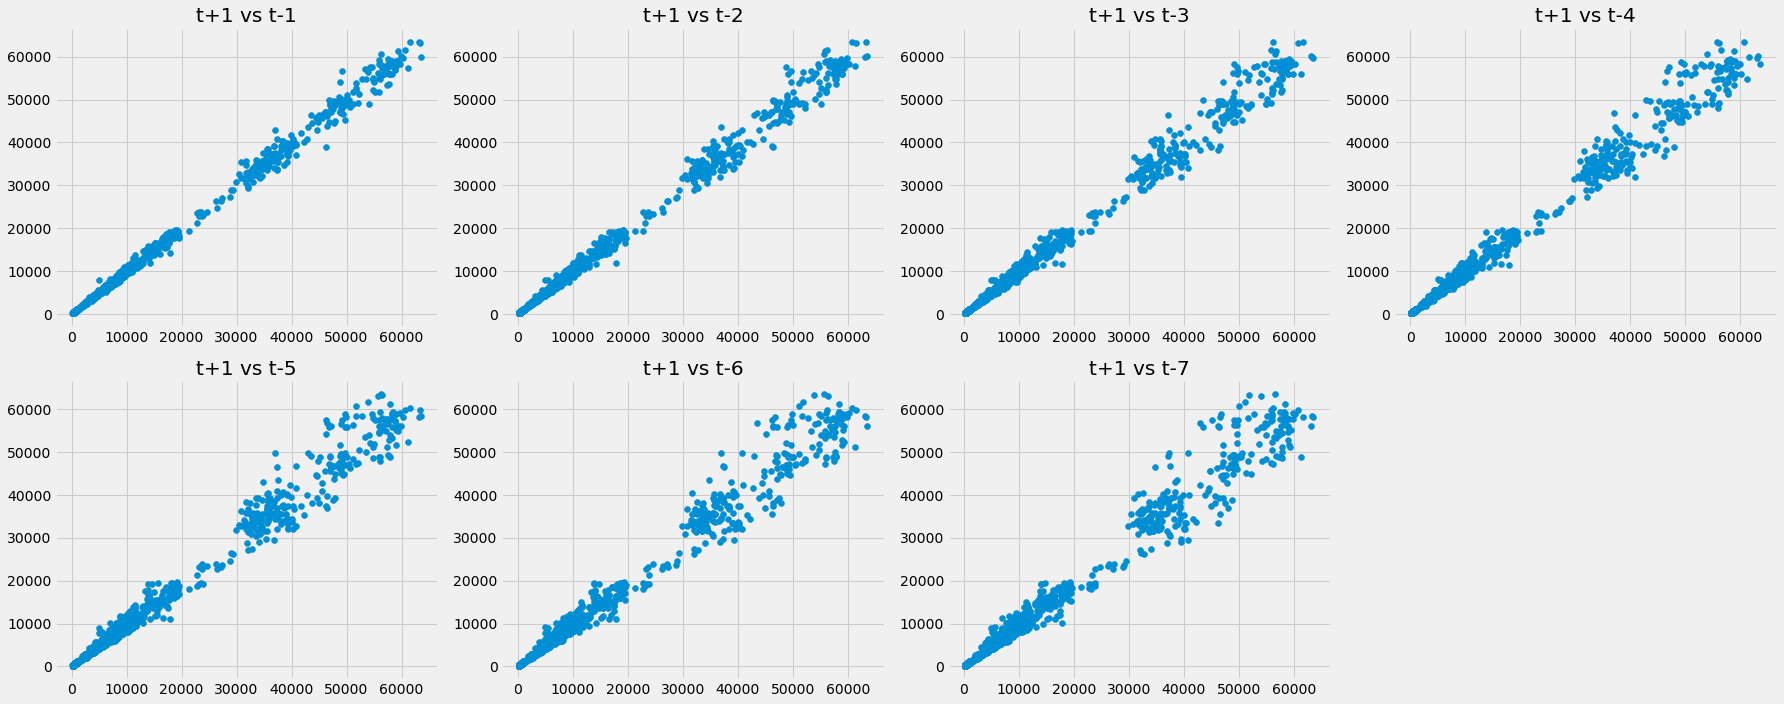

In [206]:
values = DataFrame(btc_yahoo["Adj Close"].values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
fig = plt.figure(figsize=(25, 10))
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.tight_layout()

### Autocorrelation Plots

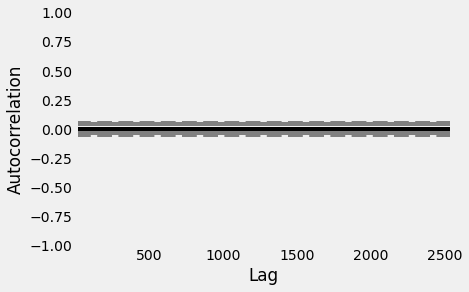

In [212]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(btc_yahoo["Adj Close"])
plt.show()

## Missing values

In [40]:
percent_missing = btc_yahoo.isnull().sum() * 100 / len(btc_yahoo)
missing_value_btc_yahoo = pd.DataFrame({'column_name': btc_yahoo.columns,
                                 'percent_missing': ((percent_missing*100).round(2)) })
missing_value_btc_yahoo.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_btc_yahoo

,column_name,percent_missing
Open,Open,15.71
High,High,15.71
Low,Low,15.71
Close,Close,15.71
Adj Close,Adj Close,15.71
Volume,Volume,15.71
Date,Date,0.00


In [22]:
btc_yahoo[btc_yahoo.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
2039,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2214,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2217,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2218,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN
